<a href="https://colab.research.google.com/github/lanashin/CST2312/blob/main/covid_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Environment Set up
Import all required libraries that are needed for data analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

### Data Collection
Decided in the group to use "owid-covid-data" github repository as a raw data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [ ]:
#showing first 5 raws of dataframe
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.303780e+05,130373.000000,129333.000000,1.190690e+05,119265.000000,129333.000000,129710.000000,129705.000000,128670.000000,118414.000000,118610.000000,128670.000000,108865.000000,16937.000000,16937.000000,19353.000000,19353.000000,1319.000000,1319.000000,2205.000000,2205.000000,5.744900e+04,5.774300e+04,57743.000000,57449.000000,6.992300e+04,69923.000000,65324.000000,64663.000000,3.619000e+04,3.456500e+04,3.160700e+04,8.831000e+03,3.014400e+04,6.449000e+04,36190.000000,34565.000000,31607.000000,8831.000000,64490.000000,6.324400e+04,63244.000000,112380.000000,1.370630e+05,124951.000000,118995.000000,117681.000000,118346.000000,119774.000000,80024.000000,119189.000000,123189.000000,92836.000000,91496.000000,59993.000000,108291.000000,128345.000000,119310.000000,4853.000000,4853.000000,4853.000000,4853.000000
mean,2.164747e+06,8510.236844,8519.425090,5.276704e+04,182.876368,167.892684,21135.345196,90.339186,90.259382,424.316327,1.596234,1.463579,0.996708,879.003424,22.499217,4024.913605,158.123370,240.280516,17.453685,3286.687528,87.933691,5.907359e+04,1.298109e+07,548.708846,2.637739,5.502803e+04,2.498287,0.087102,160.615864,1.201398e+08,6.480754e+07,4.610124e+07,4.387840e+06,1.075217e+06,5.132436e+05,55.615358,31.595706,25.364665,3.428262,3414.642689,2.677463e+05,0.176150,55.931357,1.569123e+08,402.392852,30.493164,8.740339,5.528897,19231.804150,13.522556,260.135198,8.049491,10.589479,32.753533,50.842594,3.028372,73.262221,0.726072,33380.322975,9.232879,16.382940,832.864696
std,1.229643e+07,44288.879545,43691.135976,2.702128e+05,865.770274,812.688460,34791.012502,211.682738,179.567583,688.167581,4.125994,3.120257,0.340368,2770.241245,24.610422,11103.356649,212.339079,505.520658,32.638577,10471.814296,140.180538,1.994643e+05,5.288936e+07,1337.712545,7.226286,1.775447e+05,5.912350,0.099981,833.758482,5.593381e+08,3.069019e+08,2.306800e+08,1.751091e+07,4.124098e+06,2.799983e+06,52.645006,26.826368,24.779192,7.510663,4088.665488,2.455866e+06,0.278021,20.623103,7.271618e+08,1878.208912,9.115057,6.179868,4.213769,20085.164104,19.997616,119.882544,4.321883,10.502106,13.516643,31.817863,2.454330,7.529323,0.150020,92740.602043,17.439163,31.860042,1242.477816
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,-75.911000,-10.844000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,

In [ ]:
#wanted to check how many raws and columns this dataframe has, shows 137839 raws and 67 columns
df.shape

(138048, 67)

In [ ]:
#to inspect the names of columns in data
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### Data Wrangling and EDA (Exploratory Data Analysis)

In [ ]:
#we want to chose to focus just on the usa location, it gives us 683 rows
us_df = df[df['location']=='United States']
print(us_df)

       iso_code  ... excess_mortality_cumulative_per_million
130274      USA  ...                                     NaN
130275      USA  ...                                     NaN
130276      USA  ...                                     NaN
130277      USA  ...                                     NaN
130278      USA  ...                              -27.776754
...         ...  ...                                     ...
130953      USA  ...                                     NaN
130954      USA  ...                                     NaN
130955      USA  ...                                     NaN
130956      USA  ...                                     NaN
130957      USA  ...                                     NaN

[684 rows x 67 columns]


In [ ]:
#in this command i can see what columns i can check farther 
us_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130274,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130275,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130276,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130277,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130278,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,-9247.3,-3.72,-3.1,-27.776754


In [ ]:
us_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130953,USA,North America,United States,2021-12-01,48691353.0,135379.0,85504.286,782100.0,1960.0,896.429,146257.580,406.647,256.835,2349.248,5.887,2.693,1.24,13620.0,40.911,53133.0,159.599,NaN,NaN,NaN,NaN,1093179.0,669359313.0,2010.601,3.284,944317.0,2.837,0.091,11.0,tests performed,467390470.0,235050057.0,196883639.0,44502852.0,1809687.0,1065616.0,140.78,70.80,59.30,13.40,3210.0,258673.0,0.078,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130954,USA,North America,United States,2021-12-02,48832228.0,140875.0,100971.857,785900.0,3800.0,1386.714,146680.736,423.156,303.296,2360.662,11.414,4.165,NaN,13752.0,41.308,53239.0,159.918,NaN,NaN,NaN,NaN,579176.0,669938489.0,2012.341,1.740,921433.0,2.768,0.110,9.1,tests performed,469030524.0,235409185.0,197176782.0,45500586.0,1640054.0,1296790.0,141.27,70.90,59.39,13.70,3906.0,308970.0,0.093,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130955,USA,North America,United States,2021-12-03,48990127.0,157899.0,116229.143,787695.0,1795.0,1606.000,147155.028,474.292,349.126,2366.054,5.392,4.824,NaN,13772.0,41.368,54027.0,162.285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470170528.0,235661731.0,197401868.0,46169018.0,1140004.0,1301316.0,141.61,70.98,59.46,13.91,3920.0,301710.0,0.091,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130956,USA,North America,United States,2021-12-04,49051140.0,61013.0,121437.286,788202.0,507.0,1651.714,147338.297,183.269,364.770,2367.577,1.523,4.961,NaN,13835.0,41.557,53979.0,162.140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470297845.0,235698738.0,197440859.0,46219529.0,127317.0,1203146.0,141.65,70.99,59.47,13.92,3624.0,275985.0,0.083,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130957,USA,North America,United States,2021-12-05,49085361.0,34221.0,120494.000,788363.0,161.0,1660.000,147441.089,102.792,361.936,2368.060,0.484,4.986,NaN,13573.0,40.770,52924.0,158.971,NaN,NaN,52287.0,157.058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470297846.0,235698738.0,197440859.0,46219529.0,1.0,1125791.0,141.65,70.99,59.47,13.92,3391.0,255486.0,0.077,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [ ]:
us_df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,6.840000e+02,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,683.000000,678.000000,646.000000,646.000000,678.000000,637.000000,509.000000,509.000000,509.000000,509.000000,0.0,0.0,72.000000,72.000000,6.420000e+02,6.420000e+02,642.000000,642.000000,6.350000e+02,635.000000,635.000000,635.000000,3.580000e+02,3.580000e+02,3.580000e+02,1.150000e+02,3.570000e+02,3.570000e+02,358.000000,358.000000,358.000000,115.000000,357.000000,3.570000e+02,357.000000,679.000000,684.0,6.840000e+02,6.840000e+02,6.840000e+02,6.840000e+02,6.840000e+02,6.840000e+02,6.840000e+02,6.840000e+02,6.840000e+02,6.840000e+02,0.0,6.840000e+02,6.840000e+02,6.840000e+02,91.000000,91.000000,91.000000,91.000000
mean,1.995537e+07,50.030702,71354.436523,365899.257310,1152.577485,1146.847316,59941.317044,215.872735,216.229004,1163.728435,3.665726,3.475336,1.119529,14064.569745,42.246739,53930.614931,161.995108,NaN,NaN,49981.166667,150.131875,1.043518e+06,2.831405e+08,850.488804,3.134481,1.050502e+06,3.155479,0.070951,18.057953,2.622410e+08,1.455116e+08,1.167808e+08,1.475928e+07,1.317298e+06,1.311670e+06,78.986089,43.827402,35.173994,4.445304,3950.697479,6.592937e+05,0.198574,58.410280,332915074.0,3.560800e+01,3.830000e+01,1.541300e+01,9.732000e+00,5.422545e+04,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01,391920.463736,11.588022,16.780769,1177.238564
std,1.632018e+07,38835.644945,60137.221919,253024.121748,964.828066,824.027227,49022.057424,197.346995,180.301604,732.337042,2.854170,2.464693,0.466114,7094.767555,21.311051,30829.452996,92.604564,NaN,NaN,27621.532295,82.968635,5.613171e+05,2.137338e+08,642.007123,1.686065,4.830088e+05,1.450861,0.036289,9.878981,1.495581e+08,7.653963e+07,7.166086e+07,1.479779e+07,9.678838e+05,8.282949e+05,45.046325,23.053260,21.584359,4.456890,2494.808907,4.960607e+05,0.149390,17.013689,0.0,1.493232e-13,4.621908e-13,6.577330e-14,2.666485e-14,2.548449e-10,1.222139e-14,2.616711e-12,3.199782e-14,2.275401e-13,2.133188e-13,NaN,1.511008e-14,4.693014e-13,1.444346e-15,270076.374528,5.944094,12.369645,811.247059
min,1.000000e+00,-206213.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.003000,0.000000,0.000000,0.720000,3525.000000,10.588000,12233.000000,36.745000,NaN,NaN,13373.000000,40.169000,3.480000e+02,3.480000e+02,0.001000,0.001000,1.164000e+03,0.003000,0.018000,4.900000,2.263700e+04,1.922600e+04,4.033000e+03,1.265100e+04,1.000000e+00,4.353000e+03,0.010000,0.010000,0.000000,0.000000,13.000000,4.216000e+03,0.001000,0.000000,332915074.0,3.560800e+01,3.830000e+01,1.541300e+01,9.732000e+00,5.422545e+04,1.200000e

In [ ]:
#total number of deaths in the US
total_d = us_df['total_deaths'].max()
print(total_d)

788363.0


In [ ]:
#total number of deaths in the US not to use sum because this column is comulative
total_c = us_df['total_cases'].max()
print(total_c)

49085361.0


In [ ]:
death_percentage = ((total_d/total_c)*100)
print(death_percentage)

1.6061061463926076


## Performing Data Cleaning
**Replacing missing value NaN**

Missing values NaN can be detected by running us_df.isna().sum()

In [ ]:
us_df.isna().sum()

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
                                          ... 
human_development_index                      0
excess_mortality_cumulative_absolute       593
excess_mortality_cumulative                593
excess_mortality                           593
excess_mortality_cumulative_per_million    593
Length: 67, dtype: int64

In [ ]:
#I want to replace Nun with zero in total_death data
us_df['new_deaths_smoothed'] = us_df['new_deaths_smoothed'].fillna(0)
us_df['new_cases_smoothed'] = us_df['new_cases_smoothed'].fillna(0)
us_df['total_deaths'] = us_df['total_deaths'].fillna(0)
us_df['new_cases'] = us_df['new_cases'].fillna(0)
us_df['new_deaths'] = us_df["new_deaths"].fillna(0)

us_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130274,USA,North America,United States,2020-01-22,1.0,0.0,0.000,0.0,0.0,0.000,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130275,USA,North America,United States,2020-01-23,1.0,0.0,0.000,0.0,0.0,0.000,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130276,USA,North America,United States,2020-01-24,2.0,1.0,0.000,0.0,0.0,0.000,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130277,USA,North America,United States,2020-01-25,2.0,-1.0,0.000,0.0,0.0,0.000,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130278,USA,North America,United States,2020-01-26,5.0,3.0,0.000,0.0,0.0,0.000,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,-9247.3,-3.72,-3.1,-27.776754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130953,USA,North America,United States,2021-12-01,48691353.0,18281.0,85504.286,782100.0,1960.0,896.429,146257.580,406.647,256.835,2349.248,5.887,2.693,1.24,13620.0,40.911,53133.0,159.599,NaN,NaN,NaN,NaN,1093179.0,669359313.0,2010.601,3.284,944317.0,2.837,0.091,11.0,tests performed,467390470.0,235050057.0,196883639.0,44502852.0,1809687.0,1065616.0,140.78,70.80,59.30,13.40,3210.0,258673.0,0.078,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130954,USA,North America,United States,2021-12-02,48832228.0,5496.0,100

In [ ]:
#first death in USA was on 02/29/2020
first_us_death = us_df[us_df['new_deaths']!=0]
first_us_death.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130312,USA,North America,United States,2020-02-29,25.0,8.0,1.286,1.0,1.0,0.143,0.075,0.024,0.004,0.003,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130314,USA,North America,United States,2020-03-02,55.0,23.0,5.571,6.0,5.0,0.857,0.165,0.069,0.017,0.018,0.015,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513.0,861.0,0.003,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130315,USA,North America,United States,2020-03-03,74.0,19.0,8.286,7.0,1.0,1.000,0.222,0.057,0.025,0.021,0.003,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,618.0,1479.0,0.004,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130316,USA,North America,United States,2020-03-04,107.0,33.0,13.000,11.0,4.0,1.571,0.321,0.099,0.039,0.033,0.012,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,885.0,2364.0,0.007,0.003,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130317,USA,North America,United States,2020-03-05,184.0,77.0,23.857,12.0,1.0,1.714,0.553,0.231,0.072,0.036,0.003,0.005,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1201.0,3565.0,0.011,0.004,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.37,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [ ]:
#new cases in the US
# type(us_df['new_cases'])

newcase = []
previuos_case = 0
for index, row in us_df.iterrows():
  current_case = row['new_cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  #print(newcase_count)

In [ ]:
us_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
us_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130274,USA,North America,United States,2020-01-22,1.0,0.0,NaN,NaN,0.0,0.0,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130275,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,0.0,0.0,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130276,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,0.0,0.0,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130277,USA,North America,United States,2020-01-25,2.0,-1.0,NaN,NaN,0.0,0.0,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130278,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,0.0,0.0,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,-9247.3,-3.72,-3.1,-27.776754


In [ ]:
us_df['new_cases'].sum()

34221.0

In [ ]:
us_cases = us_df['total_cases']
us_deaths = us_df['total_deaths']
us_dates = us_df['date']
us_new_cases = us_df['new_cases']
us_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130274,USA,North America,United States,2020-01-22,1.0,0.0,NaN,NaN,0.0,0.000,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130275,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,0.0,0.000,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130276,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,0.0,0.000,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130277,USA,North America,United States,2020-01-25,2.0,-1.0,NaN,NaN,0.0,0.000,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130278,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,0.0,0.000,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,-9247.3,-3.72,-3.1,-27.776754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130953,USA,North America,United States,2021-12-01,48691353.0,18281.0,85504.286,782100.0,1960.0,896.429,146257.580,406.647,256.835,2349.248,5.887,2.693,1.24,13620.0,40.911,53133.0,159.599,NaN,NaN,NaN,NaN,1093179.0,669359313.0,2010.601,3.284,944317.0,2.837,0.091,11.0,tests performed,467390470.0,235050057.0,196883639.0,44502852.0,1809687.0,1065616.0,140.78,70.80,59.30,13.40,3210.0,258673.0,0.078,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130954,USA,North America,United States,2021-12-02,48832228.0,5496.0,100971.857,78

In [ ]:
type(us_new_cases)

pandas.core.series.Series

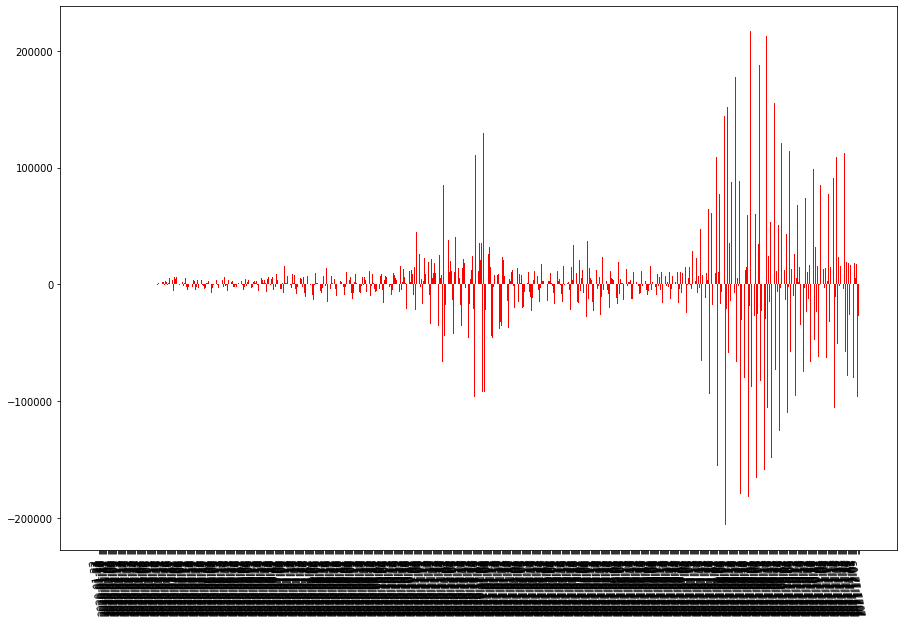

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(x=us_dates, height=us_new_cases, color='red')
plt.xticks(rotation=100)
plt.show()

In [ ]:
us_cases_30 = us_df['total_cases'][-31:-1]
us_deaths_30 = us_df['total_deaths'] [-31:-1]
us_dates_30 = us_df['date'][-31:-1]
us_new_cases_30 = us_df['new_cases'][-31:-1]


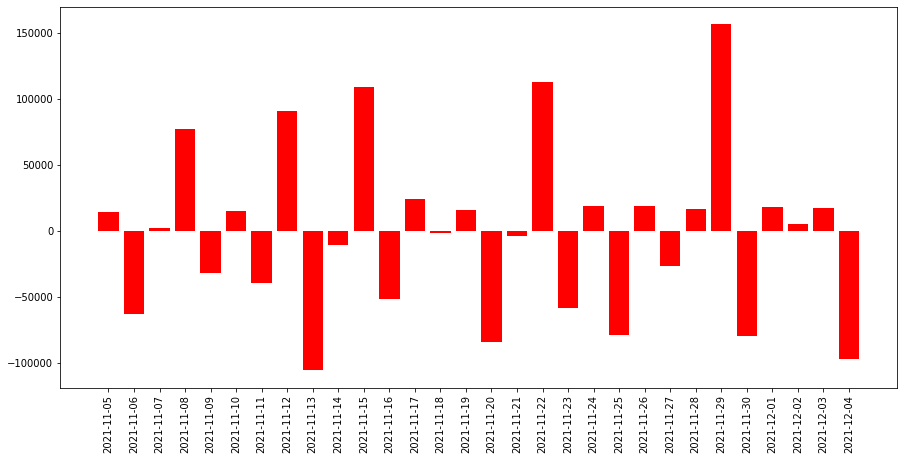

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=us_dates_30, height=us_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
us_cases_60 = us_df['total_cases'][-61:-1]
us_deaths_60 = us_df['total_deaths'] [-61:-1]
us_dates_60 = us_df['date'][-61:-1]
us_new_cases_60 = us_df['new_cases'][-61:-1]

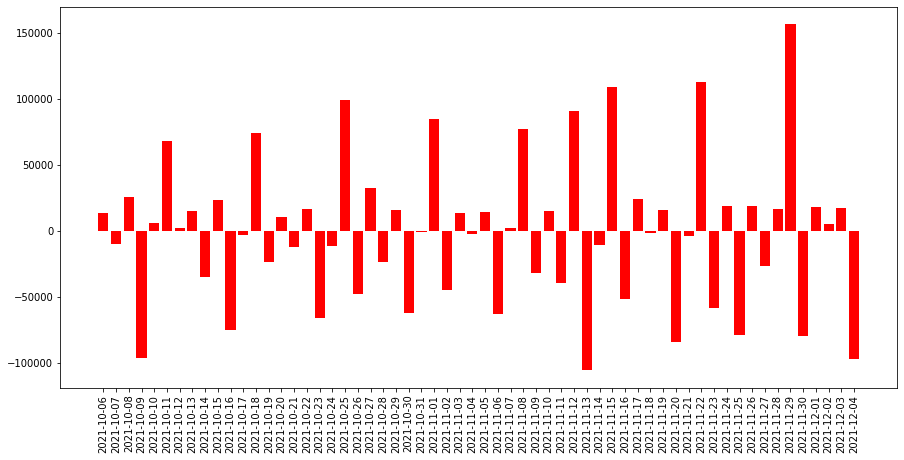

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=us_dates_60, height=us_new_cases_60, color='red')
plt.xticks(rotation=90)
plt.show()